In [1]:
import pandas as pd  
data = pd.read_excel("Uniprot_AMP_classifier.xlsx")

In [2]:
import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")
# For example, to ignore DeprecationWarnings:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [12]:
from peptides import Peptide
peptide = Peptide("SDKEVDEVDAALSDLEITLE")
peptide.descriptors()

{'BLOSUM1': 0.3670000000000001,
 'BLOSUM2': -0.43599999999999994,
 'BLOSUM3': -0.23900000000000002,
 'BLOSUM4': 0.014499999999999996,
 'BLOSUM5': -0.2535,
 'BLOSUM6': 0.164,
 'BLOSUM7': -0.4525,
 'BLOSUM8': 0.036,
 'BLOSUM9': 0.28650000000000003,
 'BLOSUM10': 0.05299999999999999,
 'PP1': 0.10099999999999998,
 'PP2': -0.5120000000000001,
 'PP3': -0.3005,
 'F1': -0.5061500000000001,
 'F2': 0.4427999999999999,
 'F3': -0.26525,
 'F4': 0.6630999999999999,
 'F5': 0.0879,
 'F6': -0.4891,
 'KF1': -0.5195000000000001,
 'KF2': -0.354,
 'KF3': -0.4124999999999999,
 'KF4': 0.284,
 'KF5': -0.5475,
 'KF6': -0.46849999999999997,
 'KF7': -0.44000000000000006,
 'KF8': -0.097,
 'KF9': 0.008500000000000013,
 'KF10': 0.2,
 'MSWHIM1': -0.39399999999999996,
 'MSWHIM2': 0.078,
 'MSWHIM3': -0.471,
 'E1': 0.05595,
 'E2': -0.019950000000000002,
 'E3': -0.18060000000000004,
 'E4': -0.027600000000000003,
 'E5': 0.07089999999999999,
 'PD1': -0.6529999999999999,
 'PD2': 0.10949999999999997,
 'ProtFP1': -1.461500000

In [15]:
dict(peptide.descriptors())

{'BLOSUM1': 0.3670000000000001,
 'BLOSUM2': -0.43599999999999994,
 'BLOSUM3': -0.23900000000000002,
 'BLOSUM4': 0.014499999999999996,
 'BLOSUM5': -0.2535,
 'BLOSUM6': 0.164,
 'BLOSUM7': -0.4525,
 'BLOSUM8': 0.036,
 'BLOSUM9': 0.28650000000000003,
 'BLOSUM10': 0.05299999999999999,
 'PP1': 0.10099999999999998,
 'PP2': -0.5120000000000001,
 'PP3': -0.3005,
 'F1': -0.5061500000000001,
 'F2': 0.4427999999999999,
 'F3': -0.26525,
 'F4': 0.6630999999999999,
 'F5': 0.0879,
 'F6': -0.4891,
 'KF1': -0.5195000000000001,
 'KF2': -0.354,
 'KF3': -0.4124999999999999,
 'KF4': 0.284,
 'KF5': -0.5475,
 'KF6': -0.46849999999999997,
 'KF7': -0.44000000000000006,
 'KF8': -0.097,
 'KF9': 0.008500000000000013,
 'KF10': 0.2,
 'MSWHIM1': -0.39399999999999996,
 'MSWHIM2': 0.078,
 'MSWHIM3': -0.471,
 'E1': 0.05595,
 'E2': -0.019950000000000002,
 'E3': -0.18060000000000004,
 'E4': -0.027600000000000003,
 'E5': 0.07089999999999999,
 'PD1': -0.6529999999999999,
 'PD2': 0.10949999999999997,
 'ProtFP1': -1.461500000

In [ ]:
for key in peptide.descriptors().keys():
    data[key] = None
for i in range(len(data)):
    peptide = Peptide(data['Sequence'].iloc[i])
    for key, value in peptide.descriptors().items():
        data[key].iloc[i] = value
    

In [19]:
data.to_excel('descriptors.xlsx')

In [3]:
import pandas as pd  
descriptor_data = pd.read_excel('descriptors.xlsx')

In [9]:
label_column = descriptor_data['Label']  # Extract the 'Label' column

# Drop the 'Label' column from the DataFrame
descriptor_data.drop(columns=['Label'], inplace=True)

# Append the 'Label' column at the end of the DataFrame
descriptor_data['Label'] = label_column

# Optionally, if you want to reset the index after manipulation
descriptor_data.reset_index(drop=True, inplace=True)

In [4]:
descriptor_data.head()

Unnamed: 0                                           Sequence   BLOSUM1  \
0           0  MLADEEITEALQHCNQPRCDILTSMAYQIGVAGLAGFHKMLEAICD...  0.210114   
1           1  MTKSMSFTIFLVFFMLIGMKLGMAKTCVKPHNNPLCEFHECNHLCV... -0.027727   
2           2  MKLTCVLIITVLFLTACQLTTAVTYSRGEHKHRALMSTGTNYRLPK...  0.005405   
3           3                                          GVVPHDFRI -0.036667   
4           4     GLFSKPAGKGIKNLIPKGVKHIGKEVGKDVIRTGIDVAGCKIKGEC  0.223478   

    BLOSUM2   BLOSUM3   BLOSUM4   BLOSUM5   BLOSUM6   BLOSUM7   BLOSUM8  ...  \
0 -0.177841 -0.099432 -0.081136 -0.020227  0.066364 -0.134545  0.029659  ...   
1 -0.212159 -0.054545  0.185455  0.059659  0.059091  0.050227 -0.059432  ...   
2 -0.277162 -0.135811  0.034189  0.286892  0.064730  0.100676 -0.205000  ...   
3 -0.148889 -0.173333  0.196667 -0.388889 -0.057778  0.181111  0.165556  ...   
4 -0.334783  0.051087 -0.035652 -0.064565  0.220870  0.206957  0.199783  ...   

      VHSE5     VHSE6     VHSE7     VHSE8        Z1        Z2        Z3  \
0 -0.370227 -0.160795  0.071591 -0.071818  0.336250 -0.425000  0.033068   
1  0.005227 -0.022159 -0.034318 -0.025682 -0.119205 -0.398523  0.280682   
2  0.263649  0.084189  0.019595  0.095405  0.318784 -0.384189 -0.526486   
3 -0.018889 -0.287778  0.234444  0.430000 -0.325556 -0.386667 -0.315556   
4  0.105000 -0.397174  0.656522 -0.111087  0.386522 -1.138478 -0.514348   

         Z4        Z5              Label  
0 -0.587955  0.157273  Non-Antimicrobial  
1 -0.030114 -0.004659  Non-Antimicrobial  
2 -0.036892 -0.125000      Antimicrobial  
3  0.145556  0.210000  Non-Antimicrobial  
4 -0.237826  0.130652  Non-Antimicrobial  

[5 rows x 91 columns]

In [5]:
descriptor_data = descriptor_data.drop("Unnamed: 0", axis=1)

In [7]:
descriptor_data

Sequence   BLOSUM1   BLOSUM2  \
0      MLADEEITEALQHCNQPRCDILTSMAYQIGVAGLAGFHKMLEAICD...  0.210114 -0.177841   
1      MTKSMSFTIFLVFFMLIGMKLGMAKTCVKPHNNPLCEFHECNHLCV... -0.027727 -0.212159   
2      MKLTCVLIITVLFLTACQLTTAVTYSRGEHKHRALMSTGTNYRLPK...  0.005405 -0.277162   
3                                              GVVPHDFRI -0.036667 -0.148889   
4         GLFSKPAGKGIKNLIPKGVKHIGKEVGKDVIRTGIDVAGCKIKGEC  0.223478 -0.334783   
...                                                  ...       ...       ...   
17995  MNNSMISPSVVDLLEKIHDRYSLVILTSKRARQIIEGAEPQISIKS...  0.179444 -0.365417   
17996  MGSFSIWHWLIVLVIVMLVFGTKKLRNIGQDLGGAVKGFKDGMKTF...  0.108767 -0.226986   
17997  MATKLVCSFAVFFILFLVIFEVPEIEAQDTECLVEYGGDVGFAFCA... -0.091531 -0.258367   
17998  MDFLKKSLFLVLFLGFFSLSICEEEKRETEEKENEQEDDREERREE...  0.208657 -0.222836   
17999  MSKEKQSFEEMMKELENIVQKLDNEAVSLEESLDLYQRGMKLSANC...  0.488289 -0.204211   

        BLOSUM3   BLOSUM4   BLOSUM5   BLOSUM6   BLOSUM7   BLOSUM8   BLOSUM9  \
0     -0.099432 -0.081136 -0.020227  0.066364 -0.134545  0.029659  0.253068   
1     -0.054545  0.185455  0.059659  0.059091  0.050227 -0.059432 -0.065568   
2     -0.135811  0.034189  0.286892  0.064730  0.100676 -0.205000  0.078378   
3     -0.173333  0.196667 -0.388889 -0.057778  0.181111  0.165556 -0.028889   
4      0.051087 -0.035652 -0.064565  0.220870  0.206957  0.199783  0.064783   
...         ...       ...       ...       ...       ...       ...       ...   
17995 -0.333194 -0.007778 -0.101806  0.151944 -0.074583 -0.016389  0.094167   
17996 -0.174658 -0.103699 -0.074932  0.262603  0.003151  0.018219  0.128767   
17997  0.005816  0.110918 -0.059082  0.028776 -0.023163  0.063265  0.116429   
17998 -0.342388 -0.104030  0.009552  0.194925 -0.116418  0.098060  0.185224   
17999 -0.336447 -0.111184  0.023158  0.216711 -0.240526  0.029605  0.161184   

       ...     VHSE5     VHSE6     VHSE7     VHSE8        Z1        Z2  \
0      ... -0.370227 -0.160795  0.071591 -0.071818  0.336250 -0.425000   
1      ...  0.005227 -0.022159 -0.034318 -0.025682 -0.119205 -0.398523   
2      ...  0.263649  0.084189  0.019595  0.095405  0.318784 -0.384189   
3      ... -0.018889 -0.287778  0.234444  0.430000 -0.325556 -0.386667   
4      ...  0.105000 -0.397174  0.656522 -0.111087  0.386522 -1.138478   
...    ...       ...       ...       ...       ...       ...       ...   
17995  ... -0.181389 -0.312917  0.212222  0.021111  0.094028 -0.505833   
17996  ... -0.010959 -0.273973  0.253151 -0.177397  0.004110 -0.667945   
17997  ... -0.132755 -0.222245 -0.017755 -0.007653 -0.285306 -0.585816   
17998  ... -0.253134 -0.175821  0.309254 -0.067463  0.288209 -0.282836   
17999  ... -0.431579 -0.044211  0.338816 -0.179868  0.932105 -0.312632   

             Z3        Z4        Z5              Label  
0      0.033068 -0.587955  0.157273  Non-Antimicrobial  
1      0.280682 -0.030114 -0.004659  Non-Antimicrobial  
2     -0.526486 -0.036892 -0.125000      Antimicrobial  
3     -0.315556  0.145556  0.210000  Non-Antimicrobial  
4     -0.514348 -0.237826  0.130652  Non-Antimicrobial  
...         ...       ...       ...                ...  
17995 -0.477222 -0.714444  0.405694      Antimicrobial  
17996 -0.521918 -0.389589  0.186164      Antimicrobial  
17997  0.185714 -0.505510 -0.011735  Non-Antimicrobial  
17998 -0.489701 -0.716119  0.184328  Non-Antimicrobial  
17999 -0.320526 -0.944605  0.209211      Antimicrobial  

[18000 rows x 90 columns]

In [16]:
descriptor_data.to_excel('descriptors.xlsx')

In [8]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
descriptor_data['Label'] = le.fit_transform(descriptor_data['Label'])

In [32]:
from sklearn.model_selection import train_test_split
X = descriptor_data.drop(columns=['Label', 'Sequence'])
y = descriptor_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [10]:
y_train

13606    0
14754    0
6348     1
6578     1
4118     1
        ..
9060     0
11752    0
4899     1
9988     1
8722     1
Name: Label, Length: 9000, dtype: int32

In [11]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
# Supervised Learning Models
svm_classifier = SVC()  # Support Vector Machine Classifier
logistic_regression = LogisticRegression()  # Logistic Regression

# Unsupervised Learning Models
kmeans = KMeans()  # KMeans Clustering

# Train the models
svm_classifier.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
kmeans.fit(X_train)

# Predictions (optional)
svm_predictions = svm_classifier.predict(X_test)
logistic_regression_predictions = logistic_regression.predict(X_test)
kmeans_clusters = kmeans.predict(X_test)

# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Calculate accuracy for Logistic Regression
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)



  File "c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1509, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


SVM Accuracy: 0.8455555555555555
Logistic Regression Accuracy: 0.8088888888888889


In [12]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for pca_value in [5, 10, 20]:
    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=pca_value)  # Specify the number of components you want to keep
    x_train_pca = pca.fit_transform(X_train)
    x_test_pca = pca.transform(X_test)

    # Train a model (for example, SVM) using the PCA-transformed features
    svm_classifier = SVC()
    logistic_regression = LogisticRegression()  # Logistic Regression
    svm_classifier.fit(x_train_pca, y_train)
    logistic_regression.fit(x_train_pca, y_train)
    # Make predictions
    svm_predictions = svm_classifier.predict(x_test_pca)

    # Predictions (optional)
    svm_predictions = svm_classifier.predict(x_test_pca)
    logistic_regression_predictions = logistic_regression.predict(x_test_pca)
    print(f"Number of PCA components : {pca_value}")
    # Calculate accuracy for SVM
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    print("SVM Accuracy:", svm_accuracy)

    # Calculate accuracy for Logistic Regression
    logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
    print("Logistic Regression Accuracy:", logistic_regression_accuracy)


Number of PCA components : 5
SVM Accuracy: 0.7954444444444444
Logistic Regression Accuracy: 0.737
Number of PCA components : 10
SVM Accuracy: 0.856
Logistic Regression Accuracy: 0.7481111111111111
Number of PCA components : 20
SVM Accuracy: 0.8832222222222222
Logistic Regression Accuracy: 0.8086666666666666


In [13]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [300],
    'max_depth': [3, 4],
    'learning_rate': [0.1, 0.01]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the XGBoost classifier with the best parameters
best_xgb_classifier = XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

# Make predictions
xgb_predictions = best_xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_predictions)
print("Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Accuracy: 0.905


In [14]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Define the CatBoost classifier
catboost_classifier = CatBoostClassifier(
    iterations=300,       # Number of boosting iterations
    depth=6,             # Maximum depth of each tree
    learning_rate=0.1    # Learning rate
)

# Train the CatBoost classifier
catboost_classifier.fit(X_train, y_train)

# Make predictions
catboost_predictions = catboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, catboost_predictions)
print("Accuracy:", accuracy)


0:	learn: 0.6392128	total: 103ms	remaining: 30.7s
1:	learn: 0.5959017	total: 115ms	remaining: 17.2s
2:	learn: 0.5605958	total: 125ms	remaining: 12.3s
3:	learn: 0.5325596	total: 132ms	remaining: 9.76s
4:	learn: 0.5111228	total: 139ms	remaining: 8.2s
5:	learn: 0.4911196	total: 145ms	remaining: 7.09s
6:	learn: 0.4744274	total: 151ms	remaining: 6.31s
7:	learn: 0.4591980	total: 157ms	remaining: 5.74s
8:	learn: 0.4469451	total: 164ms	remaining: 5.29s
9:	learn: 0.4354562	total: 171ms	remaining: 4.95s
10:	learn: 0.4268488	total: 177ms	remaining: 4.65s
11:	learn: 0.4191023	total: 184ms	remaining: 4.42s
12:	learn: 0.4115207	total: 192ms	remaining: 4.23s
13:	learn: 0.4045120	total: 199ms	remaining: 4.06s
14:	learn: 0.3992937	total: 206ms	remaining: 3.91s
15:	learn: 0.3944103	total: 213ms	remaining: 3.77s
16:	learn: 0.3888629	total: 222ms	remaining: 3.69s
17:	learn: 0.3842743	total: 229ms	remaining: 3.58s
18:	learn: 0.3801424	total: 236ms	remaining: 3.49s
19:	learn: 0.3761256	total: 244ms	remainin

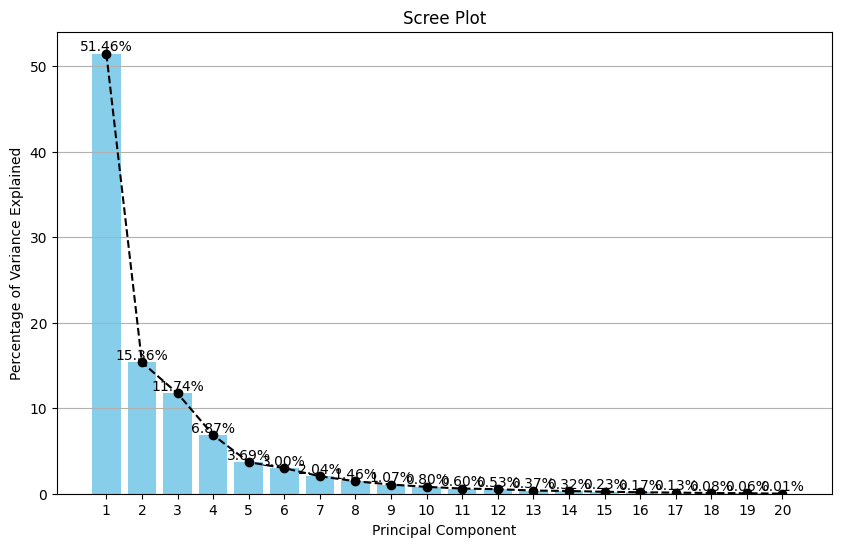

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

pca = PCA(n_components=20)  # Specify the number of components you want to keep
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

# Get the percentage of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot as a bar plot with values displayed on top of each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, 21), explained_variance_ratio * 100, color='skyblue')
plt.plot(range(1, 21), explained_variance_ratio * 100, marker='o', linestyle='--', color='black')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.xticks(range(1, 21))
plt.grid(axis='y')

# Display values on top of each bar
for bar, value in zip(bars, explained_variance_ratio * 100):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%', 
             va='bottom', ha='center')

plt.show()

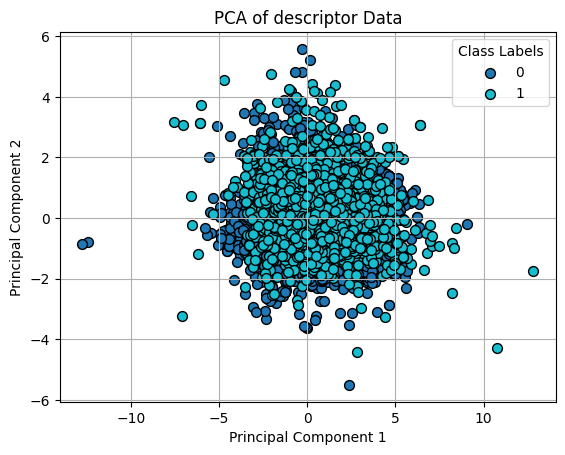

In [38]:
import numpy as np 
# Plot the first two principal components with color-coded groups
unique_labels = np.unique(y_train)
colors = plt.cm.get_cmap('tab10', len(unique_labels))  # Get a colormap with enough colors

for i, label in enumerate(unique_labels):
    indices = np.where(y_train == label)
    plt.scatter(x_train_pca[indices, 0], x_train_pca[indices, 1], s=50, label=label, edgecolor='k', color=colors(i))

plt.title('PCA of descriptor Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Class Labels")
plt.grid()
plt.show()

As you can see there is no clustering in first 2 components which means the number of independent data in the training data is huge. Thats the reason we got better accuracy for 20 components than for 5 components

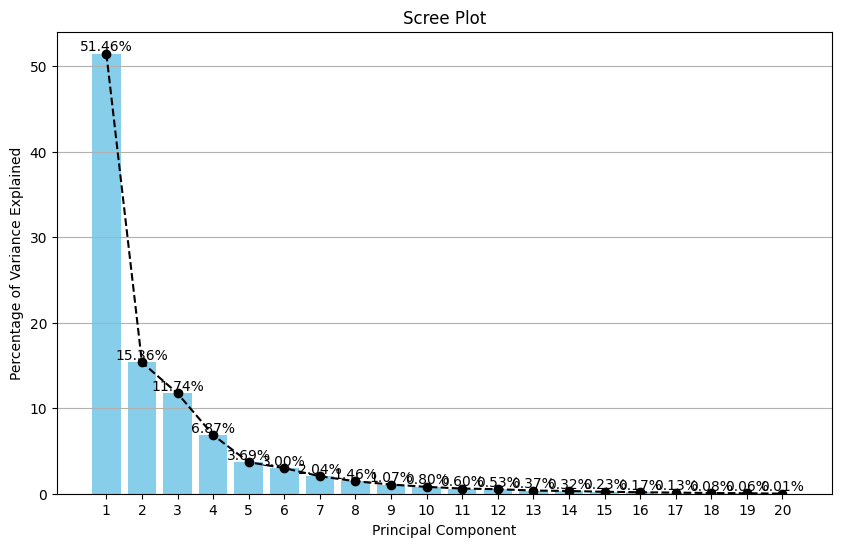

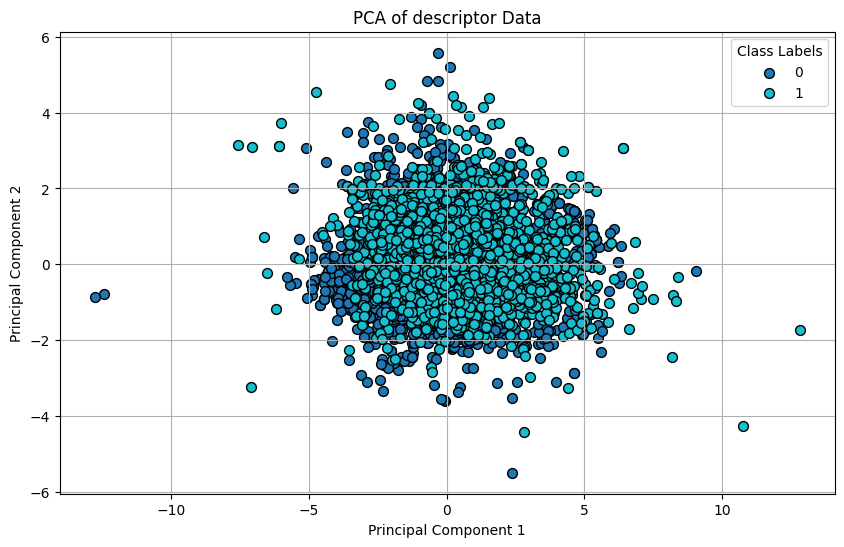

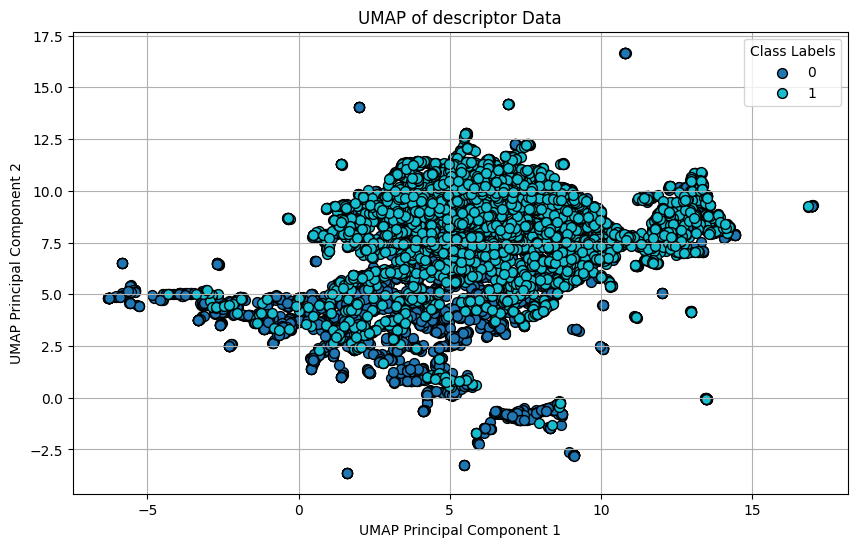

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(X_train)
# Plot the scree plot as a bar plot with values displayed on top of each bar
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, 21), explained_variance_ratio * 100, color='skyblue')
plt.plot(range(1, 21), explained_variance_ratio * 100, marker='o', linestyle='--', color='black')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.xticks(range(1, 21))
plt.grid(axis='y')

for bar, value in zip(bars, explained_variance_ratio * 100):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%', 
             va='bottom', ha='center')

plt.show()

plt.figure(figsize=(10, 6))
# Plot the first two principal components with color-coded groups
unique_labels = np.unique(y_train)
colors = plt.cm.get_cmap('tab10', len(unique_labels))  # Get a colormap with enough colors

for i, label in enumerate(unique_labels):
    indices = np.where(y_train == label)
    plt.scatter(x_train_pca[indices, 0], x_train_pca[indices, 1], s=50, label=label, edgecolor='k', color=colors(i))

plt.title('PCA of descriptor Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Class Labels")
plt.grid()
plt.show()

# Perform UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
x_train_umap = umap_reducer.fit_transform(X_train)
plt.figure(figsize=(10, 6))
# Plot the first two principal components with color-coded groups
unique_labels = np.unique(y_train)
colors = plt.cm.get_cmap('tab10', len(unique_labels))  # Get a colormap with enough colors

for i, label in enumerate(unique_labels):
    indices = np.where(y_train == label)
    plt.scatter(x_train_umap[indices, 0], x_train_umap[indices, 1], s=50, label=label, edgecolor='k', color=colors(i))

plt.title('UMAP of descriptor Data')
plt.xlabel('UMAP Principal Component 1')
plt.ylabel('UMAP Principal Component 2')
plt.legend(title="Class Labels")
plt.grid()
plt.show()


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, Y_train, X_test, and Y_test are your training and testing data
# X_train: Features of the training set
# Y_train: Labels of the training set
# X_test: Features of the testing set
# Y_test: Labels of the testing set

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
Y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8465555555555555


In [24]:
# Train the classifier on the training data
clf.fit(x_train_pca, y_train)

# Predict the labels of the test set
Y_pred = clf.predict(x_test_pca)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8305555555555556


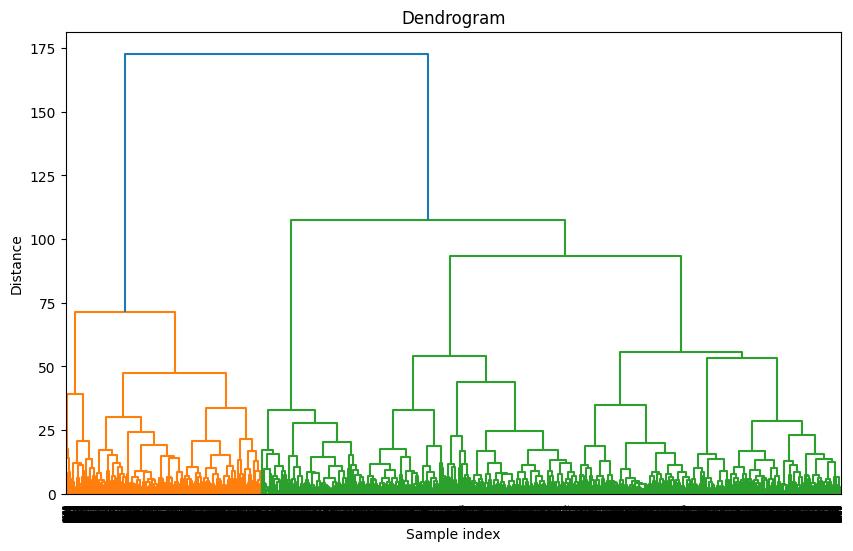

In [25]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

pca = PCA(n_components=20)  # Specify the number of components you want to keep
x_train_pca = pca.fit_transform(X_train)
# Perform hierarchical clustering
Z = linkage(X_train, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 6))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


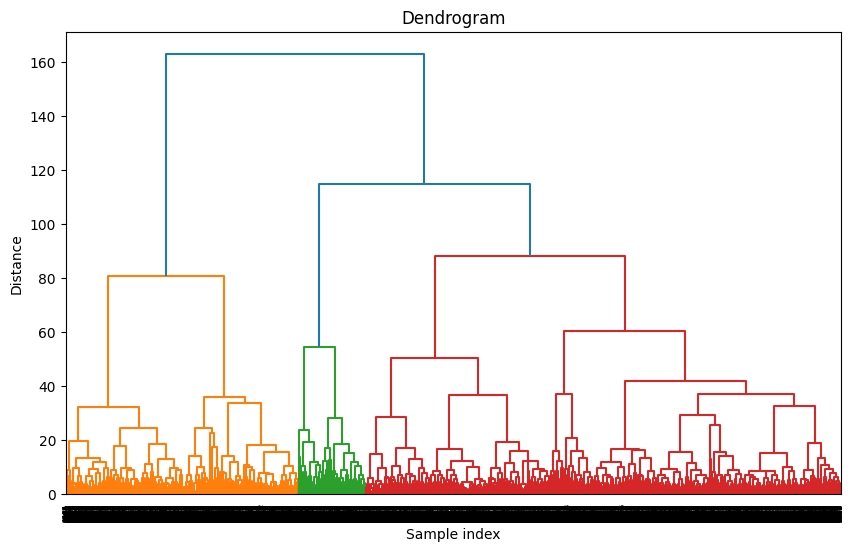

In [40]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

pca = PCA(n_components=20)  # Specify the number of components you want to keep
x_train_pca = pca.fit_transform(X_train)
# Perform hierarchical clustering
Z = linkage(x_train_pca, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 6))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


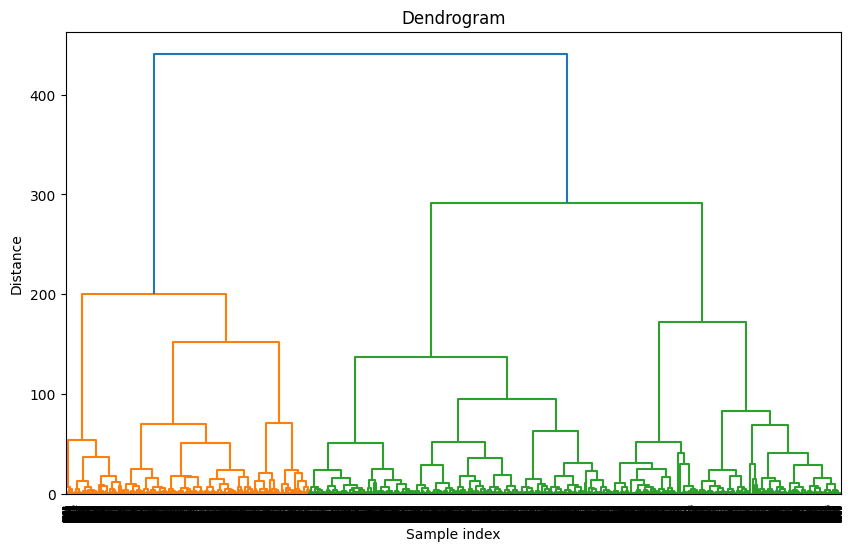

In [41]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(x_train_umap, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 6))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

1. "BLOSUM": blosum_indices,
2. "PP": cruciani_properties,
3. "F": fasgai_vectors,
4. "KF": kidera_factors,
5. "MSWHIM": ms_whim_scores,
6. "E": pcp_descriptors,
7. "PD": physical_descriptors,
8. "ProtFP": protfp_descriptors,
9. "SV": sneath_vectors,
10. "ST": st_scales,
11. "SVGER": svger_descriptors,
12. "T": t_scales,
13. "VHSE": vhse_scales,
14. "Z": z_scales,